# Starsmiles based on Cat and Dogs recap from Le wagon


## Dataset

**Dataset Structure:** The dataset is organized into three main directories—`train`, `test`, and `valid`—each containing subfolders for different tooth conditions (`Cavity`, `Implant`, `Fillings`, `Impacted Tooth`, and `Normal`).

- **Train:** Used for model training, containing a large number of segmented images across the various conditions.
- **Test:** Utilized for evaluating the model’s performance on unseen data.
- **Validation:** Helps in fine-tuning and validating the model during the training process.

**Directory Overview:**

- `test` (5 directories)
  - **Cavity:** 22 files
  - **Fillings:** 315 files
  - **Impacted Tooth:** 32 files
  - **Implant:** 104 files
  - **Normal:** 1,176 files
- `train` (5 directories)
  - **Cavity:** 576 files
  - **Fillings:** 5,242 files
  - **Impacted Tooth:** 428 files
  - **Implant:** 1,784 files
  - **Normal:** 17.1k files
- `valid` (5 directories)
  - **Cavity:** 43 files
  - **Fillings:** 540 files
  - **Impacted Tooth:** 38 files
  - **Implant:** 159 files
  - **Normal:** 2,032 files

**Key Features:**

- **🖼️ Segmented X-ray dataset:** Preprocessed with advanced techniques like contrast enhancement and masking.
- **📁 Well-organized:** Structured into directories for training, testing, and validation, each with subfolders for different dental conditions.
- **📏 Image Size:** Small, 64x64 pixels, designed to challenge and refine model performance.
- **⚡ Efficient:** Compact dataset size (~100 MB), making it quick to train, deploy, and run.

**Explore Further:** For the complete preprocessing pipeline and to explore the segmentation code, visit the GitHub repository or view the Kaggle notebook.

🔗 **Dataset Link:** [Dental Radiography Segmentation](https://www.kaggle.com/datasets/abbasseifossadat/dental-radiography-segmentation)

In [1]:
# Let's store the location of our data in 3 variables that we can re use later

#train_data_dir = "tdurova/starsmiles/raw_data/Dental_Radiography/train"
#test_data_dir = "tdurova/starsmiles/raw_data/Dental_Radiography/test"
#valid_data_dir = "tdurova/starsmiles/raw_data/Dental_Radiography/valid"

train_data_dir = "/kaggle/input/dental-radiography-segmentation/Dental_Radiography/train"
test_data_dir = "/kaggle/input/dental-radiography-segmentation/Dental_Radiography/train"
valid_data_dir = "/kaggle/input/dental-radiography-segmentation/Dental_Radiography/valid"

In [2]:
!ls
!ls /kaggle/input/dental-radiography-segmentation/
!ls /kaggle/input/dental-radiography-segmentation/Dental_Radiography/


dental_model.keras
Dental_Radiography
test  train  valid


### Dataset Integrity Tests with Assertions

Before loading the data, we run the following tests using assertions:

1. **Directory Check:** Ensure that the main `train`, `test`, and `valid` directories exist.
2. **Class Subdirectories:** Verify that each main directory contains the expected class folders (`Cavity`, `Fillings`, `Impacted Tooth`, `Implant`, `Normal`).
3. **File Presence:** Confirm that each class folder contains files, ensuring the dataset is populated.

These assertions ensure the dataset is correctly set up and ready for use.

In [3]:
import os

# Check if the directories exist
assert os.path.exists(train_data_dir), f"Training directory {train_data_dir} does not exist"
assert os.path.exists(test_data_dir), f"Test directory {test_data_dir} does not exist"
assert os.path.exists(valid_data_dir), f"Validation directory {valid_data_dir} does not exist"

print("All directories exist.")

All directories exist.


In [4]:
expected_classes = ['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal']

# Check for each expected class directory in the training, test, and validation directories
for class_name in expected_classes:
    assert os.path.exists(os.path.join(train_data_dir, class_name)), f"Class {class_name} not found in training directory"
    assert os.path.exists(os.path.join(test_data_dir, class_name)), f"Class {class_name} not found in test directory"
    assert os.path.exists(os.path.join(valid_data_dir, class_name)), f"Class {class_name} not found in validation directory"

print("All expected subdirectories exist in training, test, and validation directories.")


All expected subdirectories exist in training, test, and validation directories.


In [5]:
def check_files_in_directory(directory):
    for class_name in expected_classes:
        class_dir = os.path.join(directory, class_name)
        assert len(os.listdir(class_dir)) > 0, f"No files found in {class_dir}"

# Check that there are files in each subdirectory
check_files_in_directory(train_data_dir)
check_files_in_directory(test_data_dir)
check_files_in_directory(valid_data_dir)

print("All directories contain files.")


All directories contain files.


In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

# Updated path to match your dataset structure
img = load_img(f"{train_data_dir}/Cavity/0012_jpg.rf.4b11c696273493e2cbf801072ae9633a_segment_5368.png")
x = img_to_array(img) / 255  # We divide the pixel value by 255 to normalize between 0 and 1


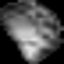

In [8]:
img

In [9]:
x.shape

(64, 64, 3)

### First (bad) model

In [10]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, optimizers, callbacks

Here we didn't use any pooling layers which gave us a super high amount of parameters ...

### First (good) model

This time WITH pooling layers

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model3 = Sequential()

# Define the input shape explicitly using Input
model3.add(Input(shape=(64, 64, 1)))

# Rescaling layer for grayscale images
model3.add(layers.Rescaling(1./255))

# First Convolutional Block
model3.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same"))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model3.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same"))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
model3.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Fourth Convolutional Block
model3.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding="same"))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flattening the output
model3.add(layers.Flatten())

# Fully Connected Dense Layer
model3.add(layers.Dense(64, activation="relu"))

# Dropout Layer for regularization
model3.add(layers.Dropout(0.5))

# Output Layer with Sigmoid Activation (for binary classification)
model3.add(layers.Dense(1, activation="sigmoid"))

# Compile the model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 233,121 (910.63 KB)

 Trainable params: 233,121 (910.63 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
adam = optimizers.Adam(learning_rate = 0.001)


In [14]:
model3.compile(loss='binary_crossentropy',
              optimizer= adam,
              metrics=['accuracy'])

Here, we'll create a `Tensorflow Datasets` object.
This will allow us to:


*   Grab images from our directory batch by batch, we won't load the FULL data at the same time
*   Reshape all the images to our desired input shape, 150x150 in this recap



We have to specify different things:


*   Where the data is located (that's why we saved the folder name in a variable)
*   The target size to resize our images so they fit our model
*   The Batch size
*   The "label mode", here we say binary, and the classes will be infered based on the folders name. It will chose cat = 0 and dog = 1
*   Here the labels are inferred based on the folder structure








In [15]:
# Common parameters
class_names = ['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal']
color_mode = 'grayscale'
batch_size = 32
image_size = (64, 64)

In [16]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Load the training data
train_ds = image_dataset_from_directory(
    train_data_dir,
    class_names=class_names,
    color_mode=color_mode,
    batch_size=batch_size,
    image_size=image_size
)

# Load the validation data
valid_ds = image_dataset_from_directory(
    valid_data_dir,
    class_names=class_names,
    color_mode=color_mode,
    batch_size=batch_size,
    image_size=image_size
)

# Load the test data
test_ds = image_dataset_from_directory(
    test_data_dir,
    class_names=class_names,
    color_mode=color_mode,
    batch_size=batch_size,
    image_size=image_size
)


Found 25136 files belonging to 5 classes.
Found 2812 files belonging to 5 classes.
Found 25136 files belonging to 5 classes.


In [17]:
class_names = train_ds.class_names
print(class_names)

['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal']


Here we'll create our callbacks. Those functions will be called at the end of every single epoch.
We'll use:


*   `ModelCheckpoint` to save the best version of our model after every epoch
*   `ReduceLROnPlateau` to reduce the `learning_rate` if the model doesn't get better after a few epochs
*   `EarlyStopping` to stop the training after a certain time if it's not improving



In [18]:
MODEL_NAME = "dental_model"

modelCheckpoint = callbacks.ModelCheckpoint(
    filepath=f"{MODEL_NAME}.keras",
    monitor="val_loss",
    verbose=0,
    save_best_only=True
)

lrReducer = callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=3,
    verbose=1,
    min_lr=0
)

earlyStopper = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=0,
    restore_best_weights=True
)

In [19]:
%%time
history = model3.fit(
    train_ds,
    epochs=30,
    validation_data=valid_ds,
    callbacks=[modelCheckpoint, lrReducer, earlyStopper]
)

history

Epoch 1/30


I0000 00:00:1725428108.952800     439 service.cc:145] XLA service 0x7c574800c330 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725428108.952845     439 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1725428108.952851     439 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 23/786 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1962 - loss: -105.5104

I0000 00:00:1725428112.209160     439 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


786/786 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.2095 - loss: -34774112534528.0000 - val_accuracy: 0.1920 - val_loss: -1966884970823680.0000 - learning_rate: 0.0010
Epoch 2/30
786/786 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.2098 - loss: -11509434316488704.0000 - val_accuracy: 0.1920 - val_loss: -113353446890930176.0000 - learning_rate: 0.0010
Epoch 3/30
786/786 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.2104 - loss: -228730149795790848.0000 - val_accuracy: 0.1920 - val_loss: -963092333899808768.0000 - learning_rate: 0.0010
Epoch 4/30
786/786 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.2102 - loss: -1439439803715158016.0000 - val_accuracy: 0.1920 - val_loss: -4007137142080798720.0000 - learning_rate: 0.0010
Epoch 5/30
786/786 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.2106 - loss: -5245153150096113664.0000 - val_accuracy: 0.1920 - val_loss: -11592141196037718016.0000 - learning_rate: 0.0010
Epoch 6/30
786/786 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.2099 

In [20]:
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [21]:
def plot_compare_history(history, name_history, history_1, name_history_1):

    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    ax[0].set_title('loss')

    ax[0].plot(history.epoch, history.history["loss"], label="Train loss " + name_history)
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss " + name_history)

    ax[0].plot(history_1.epoch, history_1.history["loss"], label="Train loss " + name_history_1)
    ax[0].plot(history_1.epoch, history_1.history["val_loss"], label="Validation loss " + name_history_1)

    ax[1].set_title('Accuracy')

    ax[1].plot(history.epoch, history.history["accuracy"], label="Train Accuracy " + name_history)
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation Accuracy " + name_history)

    ax[1].plot(history_1.epoch, history_1.history["accuracy"], label="Train Accuracy " + name_history_1)
    ax[1].plot(history_1.epoch, history_1.history["val_accuracy"], label="Validation Accuracy " + name_history_1)

    ax[0].legend()
    ax[1].legend()

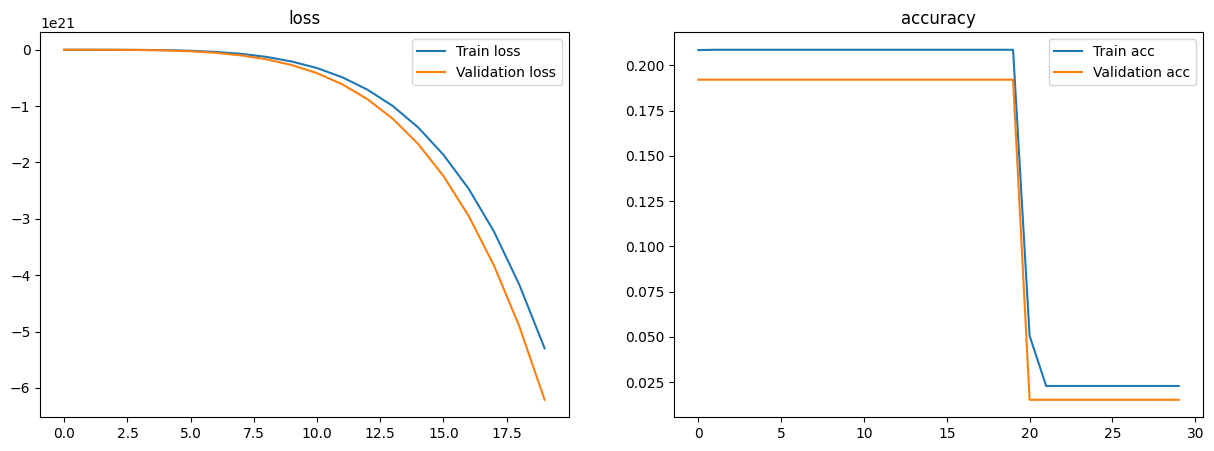

In [22]:
plot_history(history)
